## ML LAB ASSIGNMENT 

### SUPRATIM NAG -- CSE-AIML/22/057 -- GROUP-B

### Q-3:Implementation of Logistic Regression
###    (a)Create your own dataset and apply Logistic Regression on the created dataset. Print the predicted score and confusion matrix.

In [5]:
import pandas as pd
import seaborn as sb
import numpy as np
import sklearn
from matplotlib import pyplot as plt

In [6]:
file_path="C:\\Users\SUPRATIM NAG\OneDrive\Documents\ML\Personal_Datasets\Dataset.csv"

data=pd.read_csv(file_path)


In [7]:
data.head()

,Patient ID,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnosis,Treatment Plan,Recovery Status,Medication Type,Follow-up Requirement
0,101,65,130,250,72,28.0,Hypertension with high cholesterol.,"Medication: Lisinopril (blood pressure), Stati...",Active Recovery,"Lisinopril, Statins.",Quarterly.
1,102,42,110,150,76,24.0,Pre-hypertension.,"Lifestyle modification: Regular exercise, heal...",Recovered,N/A.,Six months.
2,103,58,140,200,80,30.0,Type 2 Diabetes.,Medication: Metformin (blood sugar control). L...,Active Recovery,Metformin.,Quarterly.
3,104,71,160,220,88,32.0,Heart Failure.,"Medication: Digoxin (heart function), Furosemi...",Active Recovery,"Digoxin, Furosemide.",Monthly.
4,105,35,120,180,74,27.0,Overweight.,"Lifestyle modification: Regular exercise, heal...",Recovered,N/A.,Three months.


In [8]:
data.isnull().sum()

Patient ID                0
Age                       0
Blood Pressure            0
Cholesterol Levels        0
Heart Rate                0
BMI                       0
Diagnosis                 0
Treatment Plan            0
Recovery Status          13
Medication Type           1
Follow-up Requirement     0
dtype: int64

In [9]:
data.describe()

,Patient ID,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,107.480000,49.210000,126.100000,199.850000,79.380000,26.970000
std,4.678513,13.121264,15.018171,37.121524,7.947784,4.255015
min,101.000000,25.000000,95.000000,120.000000,60.000000,18.000000
25%,103.750000,39.750000,115.000000,177.500000,75.000000,24.000000
50%,107.000000,50.000000,125.000000,200.000000,80.000000,27.000000
75%,111.000000,60.000000,135.000000,226.250000,85.000000,30.000000
max,118.000000,75.000000,160.000000,300.000000,110.000000,40.000000


(array([ 5.,  9., 11.,  9., 15., 12., 11., 10.,  9.,  9.]),
 array([25., 30., 35., 40., 45., 50., 55., 60., 65., 70., 75.]),
 <BarContainer object of 10 artists>)

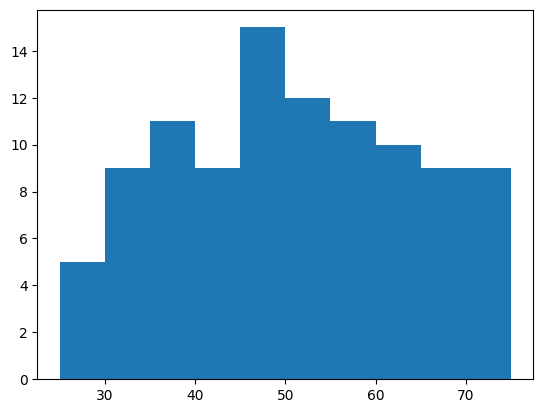

In [10]:
plt.hist(data['Age'])

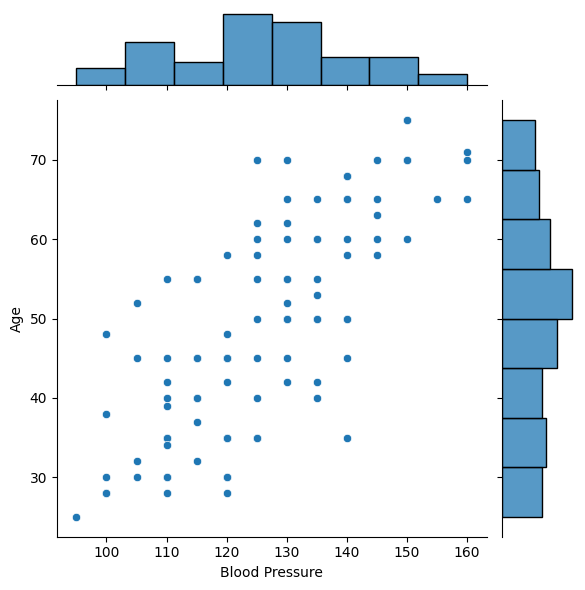

In [11]:
sb.jointplot(data=data, x='Blood Pressure', y='Age')


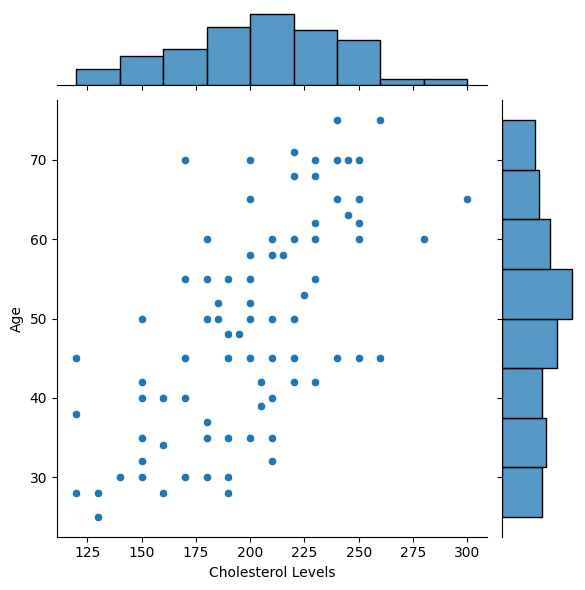

In [12]:
sb.jointplot(data=data, x='Cholesterol Levels', y='Age')

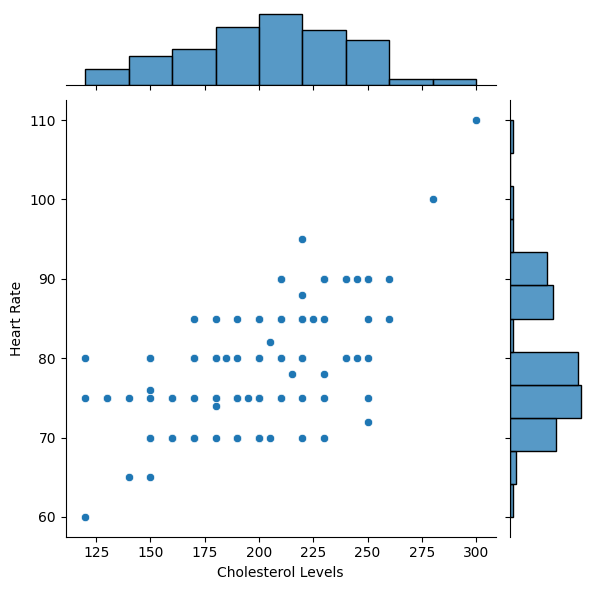

In [13]:
sb.jointplot(data=data, x='Cholesterol Levels', y='Heart Rate')

In [14]:
numerical_data = data[['Age', 'Blood Pressure', 'Cholesterol Levels', 'Heart Rate', 'BMI', 'Diagnosis']]

In [15]:
numerical_data['Diagnosis'] = numerical_data['Diagnosis'].apply(
    lambda x: 1 if 'Hypertension' in x  else 0
)

C:\Users\SUPRATIM NAG\AppData\Local\Temp\ipykernel_17360\3593694202.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_data['Diagnosis'] = numerical_data['Diagnosis'].apply(


In [16]:
print(numerical_data['Diagnosis'].value_counts())

Diagnosis
0    69
1    31
Name: count, dtype: int64


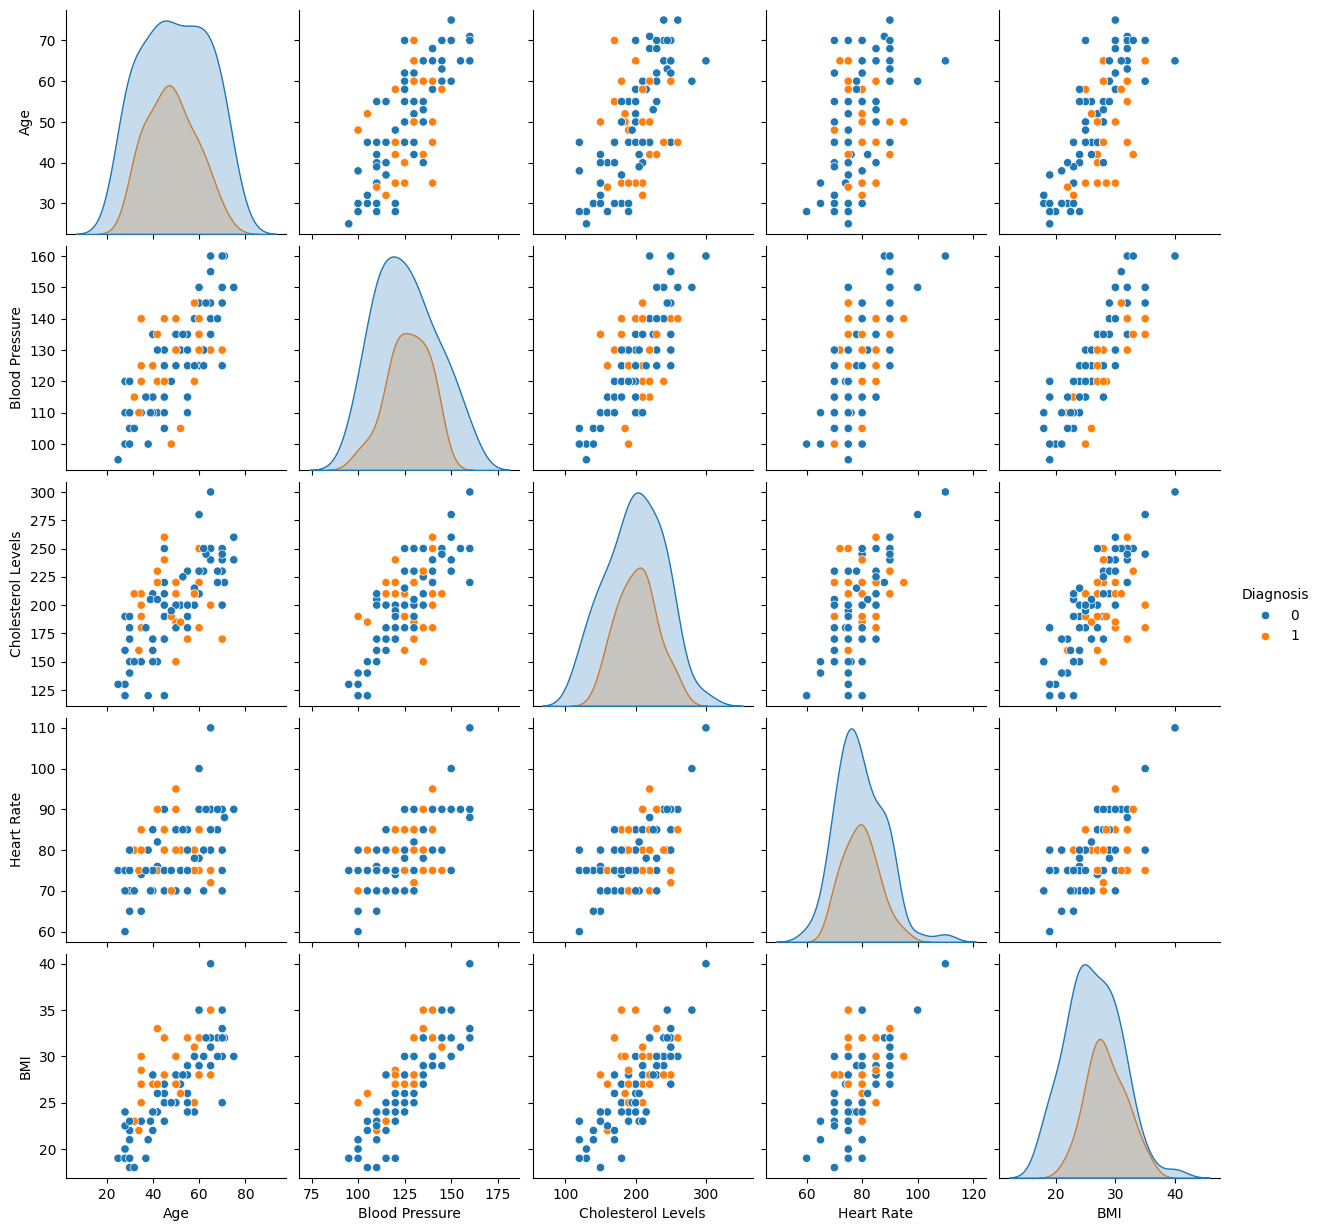

In [17]:
sb.pairplot(numerical_data,hue='Diagnosis')

In [18]:
x = numerical_data.drop('Diagnosis', axis=1)
y = numerical_data['Diagnosis']

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [20]:
from sklearn.linear_model import LogisticRegression
logic = LogisticRegression()
logic.fit(x_train,y_train) 

LogisticRegression()

In [21]:
logic.coef_

array([[-0.11477862, -0.07414491, -0.0043565 , -0.03270354,  0.72757042]])

In [22]:
predict = logic.predict(x_test)
predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0], dtype=int64)

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        17
           1       0.67      0.50      0.57         8

    accuracy                           0.76        25
   macro avg       0.73      0.69      0.70        25
weighted avg       0.75      0.76      0.75        25



In [24]:
print(confusion_matrix(y_test,predict))

[[15  2]
 [ 4  4]]


### plotting the logistic regression graph

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [26]:
X_scaled = scaler.fit_transform(x)

In [27]:
model = LogisticRegression()
model.fit(X_scaled, y)

LogisticRegression()

c:\Users\SUPRATIM NAG\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


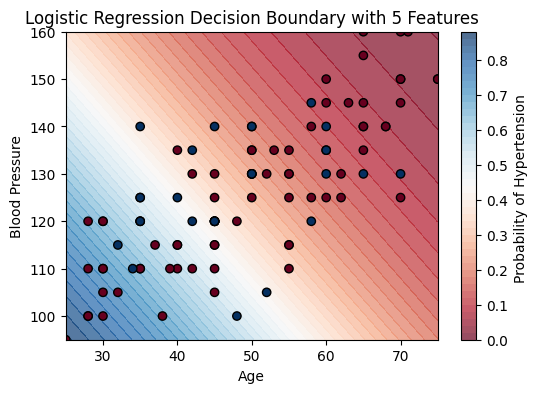

In [30]:
# Create a grid for plotting
age_range = np.linspace(x['Age'].min(), x['Age'].max(), 100)
bp_range = np.linspace(x['Blood Pressure'].min(), x['Blood Pressure'].max(), 100)
cholesterol_range = np.linspace(x['Cholesterol Levels'].min(), x['Cholesterol Levels'].max(), 100)


# Create a meshgrid for Age and Blood Pressure
xx, yy = np.meshgrid(age_range, bp_range)

# Prepare a grid for predictions
Z = np.zeros((len(xx.ravel()), 5))  # 5 features
Z[:, 0] = xx.ravel()  # Age
Z[:, 1] = yy.ravel()  # Blood Pressure
Z[:, 2] = np.mean(x['Cholesterol Levels'])  # Average Cholesterol Levels
Z[:, 3] = np.mean(x['Heart Rate'])  # Average Heart Rate
Z[:, 4] = np.mean(x['BMI'])  # Average BMI

# Standardize the grid
Z_scaled = scaler.transform(Z)

# Predict probabilities for the grid
Z_prob = model.predict_proba(Z_scaled)[:, 1]
Z_prob = Z_prob.reshape(xx.shape)

# Plotting
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, Z_prob, levels=50, cmap='RdBu', alpha=0.7)
plt.colorbar(label='Probability of Hypertension ')
plt.scatter(x['Age'], x['Blood Pressure'], c=y, edgecolors='k', cmap='RdBu', marker='o')
plt.title('Logistic Regression Decision Boundary with 5 Features')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.show()